In [1]:
#importing required packages
import pandas as pd
import datetime
import calendar
from pylab import rcParams

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 


import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("E:\Simplilearn\Data Science with Python\Projects\Walmart\Walmart_Store_sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
df.shape

(6435, 8)

In [7]:
#Adding Week, Quarter, Month, Year

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Week_Number'] = df['Date'].dt.week
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df['Year'] = df['Date'].dt.year
df['yr_qr'] = df['Year'].astype(str) + '_' + 'Q' + df['Quarter'].astype(str)

In [8]:
df_aux=df
df_aux

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Number,Quarter,Month,Year,yr_qr
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,1,Feb,2010,2010_Q1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,1,Feb,2010,2010_Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,1,Feb,2010,2010_Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,1,Feb,2010,2010_Q1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,1,Mar,2010,2010_Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,3,Sep,2012,2012_Q3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,4,Oct,2012,2012_Q4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,4,Oct,2012,2012_Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,4,Oct,2012,2012_Q4


In [9]:
#Maximum Sales - groupby Store and sum the sales

df1 = df.groupby(['Store']).agg({'Weekly_Sales': 'sum'})
df1["%"] = df1.apply(lambda x:  100*x / x.sum()).applymap('{:.2f}%'.format)
df1.head()

,Weekly_Sales,%
Store,,
1,2.224028e+08,3.30%
2,2.753824e+08,4.09%
3,5.758674e+07,0.85%
4,2.995440e+08,4.45%
5,4.547569e+07,0.67%


In [10]:
max_storeSales = df1.max()['Weekly_Sales']
max_storeSales

301397792.46000004

In [11]:
print(df1[df1.Weekly_Sales == df1.Weekly_Sales.max()])

       Weekly_Sales      %
Store                     
20     3.013978e+08  4.47%


In [12]:
#Maximum Standard Deviation

df2 = df.groupby(['Store']).agg({'Weekly_Sales': 'std'})
max_storeSales = df2.max()['Weekly_Sales']
max_storeSales
print(df2[df2.Weekly_Sales == df2.Weekly_Sales.max()])

        Weekly_Sales
Store               
14     317569.949476


In [13]:
#Coefficient of Variation - the coefficient of mean to standard deviation
#Coefficient of Variation = Standard deviation / mean

SD = df1.std()['Weekly_Sales']
Mean = df1.mean()['Weekly_Sales']
CoV = "{:.2%}".format(SD/Mean)
print(CoV)

52.21%


In [14]:
#good quarterly growth rate in Q3’2012

#Maximum Sales - groupby Store and sum the sales

df3 = df.groupby(['Store','yr_qr']).agg({'Weekly_Sales': 'sum'})
df3.sort_values("yr_qr", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

max_QtrSales = df3.max()['Weekly_Sales']
print(df3[df3.Weekly_Sales == df3.Weekly_Sales.max()])

               Weekly_Sales
Store yr_qr                
20    2010_Q4   32573122.65


In [15]:
qtrs=['2012_Q2','2012_Q3']
sol_df=df[df.yr_qr.isin(qtrs)]
sol_df.head()

df4=pd.DataFrame(sol_df.groupby(['Store','yr_qr'])['Weekly_Sales'].sum())
df4.reset_index(inplace=True) 

# Reshaping the data frame from long to wide format
df5=df4.pivot(index='Store', columns='yr_qr', values='Weekly_Sales')

df5['Growth'] = (df5['2012_Q3']/df5['2012_Q2'])-1
df5.head()

yr_qr,2012_Q2,2012_Q3,Growth
Store,,,
1,20978760.12,20253947.78,-0.034550
2,25083604.88,24303354.86,-0.031106
3,5620316.49,5298005.47,-0.057347
4,28454363.67,27796792.46,-0.023110
5,4466363.69,4163790.99,-0.067745


In [16]:
Store_max_growth = df5.max()['Growth']
print(df5[df5.Growth == df5.Growth.max()])

yr_qr     2012_Q2     2012_Q3    Growth
Store                                  
7      7290859.27  8262787.39  0.133308


In [17]:
#holidays which have higher sales than the mean sales - Creating subsets and finding means

holiday_df=df.loc[df['Holiday_Flag']==1]
Nonholiday_df=df.loc[df['Holiday_Flag']==0]

Nonholiday_df=pd.DataFrame(Nonholiday_df.groupby(['Year','Month'])['Weekly_Sales'].mean())
holiday_df=pd.DataFrame(holiday_df.groupby(['Year','Month'])['Weekly_Sales'].mean())

In [18]:
# holidays which have higher sales than the mean sales - merge and difference
Holiday_sales_impact= pd.merge(Nonholiday_df,
                 holiday_df,
                 on=['Year', 'Month'], 
                 how='inner')

Holiday_sales_impact.rename(columns={'Weekly_Sales_x':'Average_Sales_Non-Holiday', 'Weekly_Sales_y':'Average_Sales_Holiday'} , inplace = True)

Holiday_sales_impact['Difference'] = Holiday_sales_impact["Average_Sales_Holiday"] > Holiday_sales_impact["Average_Sales_Non-Holiday"]
                                     
Holiday_sales_impact

Average_Sales_Non-Holiday  Average_Sales_Holiday  Difference
Year Month                                                              
2010 Dec                 1.379600e+06           8.985004e+05       False
     Feb                 1.051824e+06           1.074148e+06        True
     Nov                 1.015055e+06           1.462689e+06        True
     Sep                 9.750630e+05           1.014098e+06        True
2011 Dec                 1.344642e+06           1.023166e+06       False
     Feb                 1.029594e+06           1.051915e+06        True
     Nov                 1.063472e+06           1.479858e+06        True
     Sep                 9.671362e+05           1.039183e+06        True
2012 Feb                 1.052253e+06           1.111320e+06        True
     Sep                 9.801147e+05           1.074001e+06        True

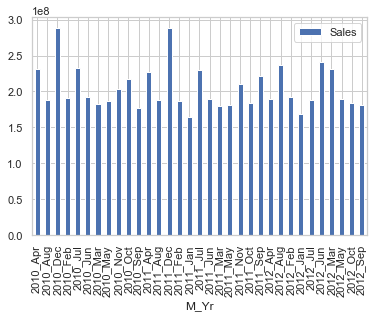

In [19]:
#monthly and semester view of sales in units and give insights

#Montly_Sales_Trend
Monthly_Sales = df.groupby(['Year','Month']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})
Monthly_Sales['M_Yr'] = Monthly_Sales['Year'].astype(str) + '_' + Monthly_Sales['Month'].astype(str)
Monthly_Sales.head()
Monthly_Sales.plot.bar(x='M_Yr', y='Sales')

In [20]:
max_MonthlySales = Monthly_Sales.max()['Sales']
print(Monthly_Sales[Monthly_Sales.Sales == Monthly_Sales.Sales.max()])

   Year Month         Sales      M_Yr
2  2010   Dec  2.887605e+08  2010_Dec


In [21]:
#Montly_Sales_Trend - Store wise

Monthly_Sales = df.groupby(['Store','Year','Month']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})
Monthly_Sales['M_Yr'] = Monthly_Sales['Year'].astype(str) + '_' + Monthly_Sales['Month'].astype(str)
max_MonthlySalesStore = Monthly_Sales.max()['Sales']
print(Monthly_Sales[Monthly_Sales.Sales == Monthly_Sales.Sales.max()])

     Store  Year Month        Sales      M_Yr
629     20  2010   Dec  13553791.64  2010_Dec


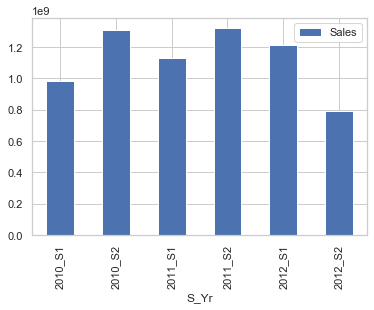

In [22]:
#semester field
conditions = [
    (df['Quarter'] == 1) | (df['Quarter'] == 2) ,
    (df['Quarter'] == 3) | (df['Quarter'] == 4) 
]
choices = [1, 2]
df['Semester'] = np.select(conditions, choices)

#Semester_Sales_Trend
Semester_Sales = df.groupby(['Year','Semester']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})
Semester_Sales['S_Yr'] = Semester_Sales['Year'].astype(str) + '_' + 'S' + Semester_Sales['Semester'].astype(str)

Semester_Sales.plot.bar(x='S_Yr', y='Sales')

In [23]:
max_SemesterSales = Semester_Sales.max()['Sales']
print(Semester_Sales[Semester_Sales.Sales == Semester_Sales.Sales.max()])

   Year  Semester         Sales     S_Yr
3  2011         2  1.320860e+09  2011_S2


In [24]:
#Semester_Sales_Trend - Storewise

Semester_Sales = df.groupby(['Store','Year','Semester']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})
Semester_Sales['S_Yr'] = Semester_Sales['Year'].astype(str) + '_' + 'S' + Semester_Sales['Semester'].astype(str)
max_SemesterSalesStore = Semester_Sales.max()['Sales']
print(Semester_Sales[Semester_Sales.Sales == Semester_Sales.Sales.max()])

    Store  Year  Semester        Sales     S_Yr
21      4  2011         2  60366595.85  2011_S2


In [25]:
df["Month1"] = df["Date"].apply(lambda x: x.month)

In [26]:
x = df.groupby(["Year", "Month1"]).mean().Weekly_Sales.unstack()
x

Month1,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.057405e+06,1.010666e+06,1.028499e+06,1.037283e+06,1.068034e+06,1.033689e+06,1.042445e+06,9.848216e+05,9.651637e+05,1.126963e+06,1.283380e+06
2011,909466.482389,1.035174e+06,9.964247e+05,1.006784e+06,1.009156e+06,1.054297e+06,1.021828e+06,1.047774e+06,9.815455e+05,1.018118e+06,1.167569e+06,1.280347e+06
2012,938302.620333,1.067020e+06,1.028932e+06,1.049561e+06,1.048703e+06,1.069379e+06,1.041719e+06,1.052670e+06,1.003586e+06,1.024232e+06,NaN,NaN


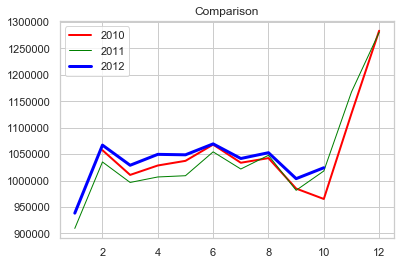

In [27]:
plt.plot(x.loc[2010, :], label = "2010", color = "red", linewidth = 2)
plt.plot(x.loc[2011, :], label = "2011", color = "green", linewidth = 1)
plt.plot(x.loc[2012, :], label = "2012", color = "blue", linewidth=3)
plt.legend(loc = "best")
plt.title("Comparison")
plt.show()

In [28]:
# B. Statistical Model - For Store 1 – Build prediction models to forecast demand
#Change dates into days by creating new variable.

df['Day'] = df.Date.apply(lambda x: x.day)
df['WeekNum'] = pd.cut(df.Day, bins = [1,7,14,21,28, 31], labels = [1,2,3,4,5], include_lowest=True)
df.drop(['Date','yr_qr','Month'], axis = 1, inplace = True)
df = df.astype(np.float64)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Number,Quarter,Year,Semester,Month1,Day,WeekNum
0,1.0,1643690.90,0.0,42.31,2.572,211.096358,8.106,5.0,1.0,2010.0,1.0,2.0,5.0,1.0
1,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,6.0,1.0,2010.0,1.0,2.0,12.0,2.0
2,1.0,1611968.17,0.0,39.93,2.514,211.289143,8.106,7.0,1.0,2010.0,1.0,2.0,19.0,3.0
3,1.0,1409727.59,0.0,46.63,2.561,211.319643,8.106,8.0,1.0,2010.0,1.0,2.0,26.0,4.0
4,1.0,1554806.68,0.0,46.50,2.625,211.350143,8.106,9.0,1.0,2010.0,1.0,3.0,5.0,1.0


In [29]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Number,Quarter,Year,Semester,Month1,Day,WeekNum
0,1.0,1643690.90,0.0,42.31,2.572,211.096358,8.106,5.0,1.0,2010.0,1.0,2.0,5.0,1.0
1,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,6.0,1.0,2010.0,1.0,2.0,12.0,2.0
2,1.0,1611968.17,0.0,39.93,2.514,211.289143,8.106,7.0,1.0,2010.0,1.0,2.0,19.0,3.0
3,1.0,1409727.59,0.0,46.63,2.561,211.319643,8.106,8.0,1.0,2010.0,1.0,2.0,26.0,4.0
4,1.0,1554806.68,0.0,46.50,2.625,211.350143,8.106,9.0,1.0,2010.0,1.0,3.0,5.0,1.0


In [30]:
#Creating a subset for Store 1
Store1_df=df.loc[df['Store']==1]
Store1_df=Store1_df[['Weekly_Sales','Day','Month1','WeekNum','Year', 'Fuel_Price', 'CPI', 'Unemployment','Holiday_Flag', 'Temperature']]

In [31]:
Store1_df.corr()

,Weekly_Sales,Day,Month1,WeekNum,Year,Fuel_Price,CPI,Unemployment,Holiday_Flag,Temperature
Weekly_Sales,1.000000,-0.271685,0.202188,-0.249095,0.152396,0.124592,0.225408,-0.097955,0.194905,-0.222701
Day,-0.271685,1.000000,0.015192,0.975592,0.006406,0.030806,0.033588,-0.018342,0.044526,0.051077
Month1,0.202188,0.015192,1.000000,0.047315,-0.194465,-0.101256,0.050952,0.040821,0.122996,0.246417
WeekNum,-0.249095,0.975592,0.047315,1.000000,-0.010680,0.033077,0.024007,0.015458,0.045056,0.081582
Year,0.152396,0.006406,-0.194465,-0.010680,1.000000,0.809769,0.948141,-0.798149,-0.056783,0.068843
Fuel_Price,0.124592,0.030806,-0.101256,0.033077,0.809769,1.000000,0.755259,-0.513944,-0.085903,0.228493
CPI,0.225408,0.033588,0.050952,0.024007,0.948141,0.755259,1.000000,-0.813471,-0.028919,0.118503
Unemployment,-0.097955,-0.018342,0.040821,0.015458,-0.798149,-0.513944,-0.813471,1.000000,0.082949,-0.180695
Holiday_Flag,0.194905,0.044526,0.122996,0.045056,-0.056783,-0.085903,-0.028919,0.082949,1.000000,-0.200543
Temperature,-0.222701,0.051077,0.246417,0.081582,0.068843,0.228493,0.118503,-0.180695,-0.200543,1.000000


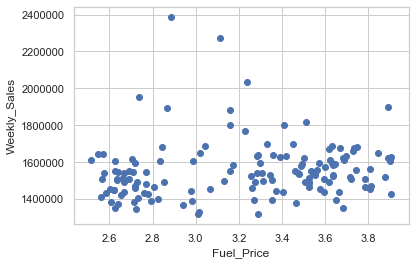

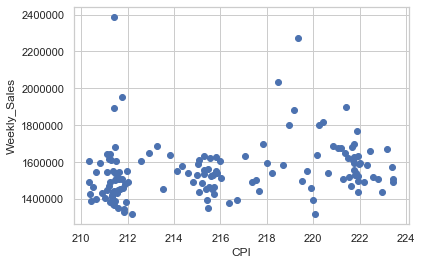

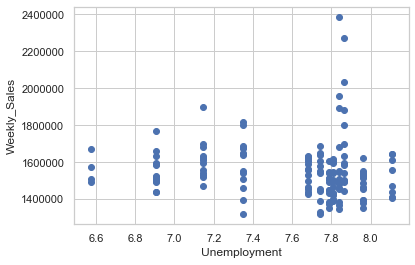

In [32]:
def scatter(Store1_df, column):
    plt.figure()
    plt.scatter(Store1_df[column] , Store1_df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)
    
scatter(Store1_df, 'Fuel_Price')
scatter(Store1_df, 'CPI')
scatter(Store1_df, 'Unemployment')

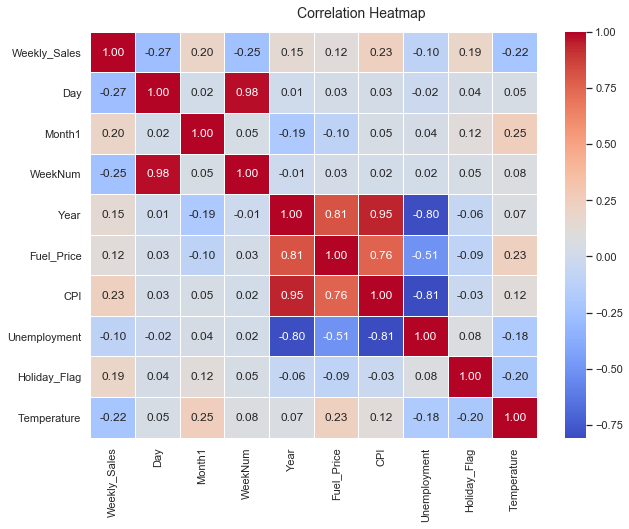

In [33]:
# Correlation Matrix Heatmap

f, ax = plt.subplots(figsize=(10, 7))
corr = Store1_df.corr()

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [34]:
features=Store1_df[['Weekly_Sales','Day','Month1','Year', 'CPI', 'Unemployment','Holiday_Flag', 'Temperature']]
features.head()

,Weekly_Sales,Day,Month1,Year,CPI,Unemployment,Holiday_Flag,Temperature
0,1643690.90,5.0,2.0,2010.0,211.096358,8.106,0.0,42.31
1,1641957.44,12.0,2.0,2010.0,211.242170,8.106,1.0,38.51
2,1611968.17,19.0,2.0,2010.0,211.289143,8.106,0.0,39.93
3,1409727.59,26.0,2.0,2010.0,211.319643,8.106,0.0,46.63
4,1554806.68,5.0,3.0,2010.0,211.350143,8.106,0.0,46.50


In [35]:
#Splitting data into train and test

train,test = train_test_split(features,test_size=0.2,random_state=39)

In [36]:
#Linear Regression – Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

lm = smf.ols(formula='Weekly_Sales ~ Temperature + Holiday_Flag  + CPI ' , data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     8.935
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           2.39e-05
Time:                        14:32:00   Log-Likelihood:                -1503.6
No. Observations:                 114   AIC:                             3015.
Df Residuals:                     110   BIC:                             3026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.474e+05   6.32e+05     -0.707      0.481    -1.7e+06    8.06e+05
Temperature  -2779.9958    915.429     -3.037      0.003   -4594.161    -965.831
Holiday_Flag  1.064e+05   4.96e+04      2.148      0.034    8220.541    2.05e+05
CPI           1.009e+04   2930.164      3.442      0.001    4279.643    1.59e+04
==============================================================================
Omnibus:                       43.875   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.782
Skew:                           1.350   Prob(JB):                     4.43e-31
Kurtosis:                       7.705   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
features1=features[['Weekly_Sales','Day','Month1','Year']]

In [38]:
#Loading test and train data set

X = features1
Y = Store1_df['Weekly_Sales']

X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [39]:
#Linear Regression

linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)

print("Intercept: ", linear_reg.intercept_)
print("Coefficient: " , linear_reg.coef_)

Intercept:  -1.862645149230957e-09
Coefficient:  [ 1.00000000e+00  1.03982846e-13 -8.81859399e-14  9.10074316e-13]


In [40]:
y_pred = linear_reg.predict(X_test)
print(y_pred)

[1684519.99 1503284.06 1550229.22 1881176.67 1636263.41 1425100.71
 1592409.97 1629391.28 1604775.58 1542561.09 1316899.31 1624383.75
 2033320.66 1597868.05 1550369.92 1455090.69 1508237.76 1635078.41
 1540421.49 1488538.09 1391256.12 1595901.87 1677472.78 1899676.88
 1456800.28 1891034.93 1545418.53 1554806.68 1605491.78]


In [41]:
mse = metrics.mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print('%.2f'%rmse)

0.00


Text(0, 0.5, 'Predicted Values')

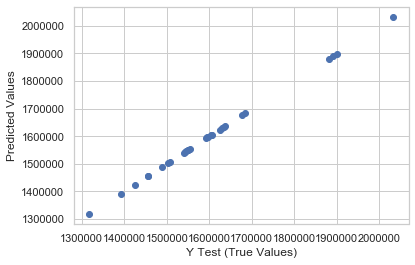

In [42]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [43]:
print('MAE:', '%.2f'%metrics.mean_absolute_error(Y_test,y_pred))
print('MSE:', '%.2f'%metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:', '%.2f'%np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE: 0.00
MSE: 0.00
RMSE: 0.00


In [44]:
##1.Linear Regression

clf = LinearRegression()

clf.fit(X_train, Y_train)

y_pred_lr=clf.predict(X_test)

acc_lr=round( clf.score(X_train, Y_train) * 100, 2)

print ("Accuracy:%i %% \n"%acc_lr)

Accuracy:100 % 



In [45]:
##2. Random Forest

clf = RandomForestRegressor(n_estimators=100)

clf.fit(X_train, Y_train)

y_pred_rf=clf.predict(X_test)

acc_rf= round(clf.score(X_train, Y_train) * 100, 2)

print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [46]:
##3. Decision Tree

clf=DecisionTreeRegressor()

clf.fit(X_train, Y_train)

y_pred_dt= clf.predict(X_test)

acc_dt = round( clf.score(X_train, Y_train) * 100, 2)

print ("Accuracy: %i %% \n"%acc_dt)

Accuracy: 100 % 



In [48]:
##Comparing Models - Let's compare the accuracy score of all the regression models used above.

models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_lr, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,100.00
2,Decision Tree,100.00
1,Random Forest,99.37


In [49]:
submission = pd.DataFrame({
        "Store_Weekly_Sales": test.Weekly_Sales,
        "Predicted_Weekly_Sales_linear": y_pred_lr
    })
submission.head()

,Store_Weekly_Sales,Predicted_Weekly_Sales_linear
6,1472515.79,1684519.99
122,1697230.96,1503284.06
112,1649604.63,1550229.22
119,1595901.87,1881176.67
97,1881176.67,1636263.41


Text(0, 0.5, 'Predicted Values')

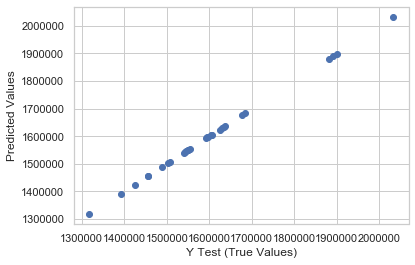

In [50]:
plt.scatter(Y_test,y_pred_lr)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [51]:
print('MAE ', metrics.mean_absolute_error(Y_test,y_pred_lr))
print('MSE ', metrics.mean_squared_error(Y_test,y_pred_lr))
print('RMSE ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_lr)))

MAE  0.0
MSE  0.0
RMSE  0.0
